In [116]:
# Dependencies
import numpy as np
import tweepy
import time
import json
from config import consumer_key, consumer_secret, access_token, access_token_secret
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [117]:
#function to get the twitter followers count
def twitter_followers( res_name ):
   # Setup Tweepy API Authentication
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
   #Get the  followers count 
    user = api.get_user(res_name)
    return user['followers_count']


In [118]:
#Import Data(Nutrition Facts)  from file 
# load CSV
nutr_file = "Nutrition Data for Fast Food 2017.csv"
nutr_pd = pd.read_csv(nutr_file, encoding='iso-8859-1', low_memory=False)
nutr_pd.rename(columns={'Fast_Food_Restaurant': 'Restaurant_Name'}, inplace=True)
nutr_pd.head()

,Restaurant_Name,Item,Type,Serving_Size,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Sodium,Carbs,Sugars,Protein
0,McDonald's,Hamburger,Burger,98,240,8.0,3.0,0.0,480,32.0,6.0,12.0
1,McDonald's,Cheeseburger,Burger,113,290,11.0,5.0,0.5,680,33.0,7.0,15.0
2,McDonald's,Big Mac,Burger,211,530,27.0,10.0,1.0,960,47.0,9.0,24.0
3,McDonald's,Quarter Pounder with Cheese,Burger,202,520,26.0,12.0,1.5,1100,41.0,10.0,30.0
4,McDonald's,Bacon Clubhouse Burger,Burger,270,720,40.0,15.0,1.5,1470,51.0,14.0,39.0


([<matplotlib.axis.XTick at 0x1a1bb39b38>,
 <a list of 6 Text xticklabel objects>)

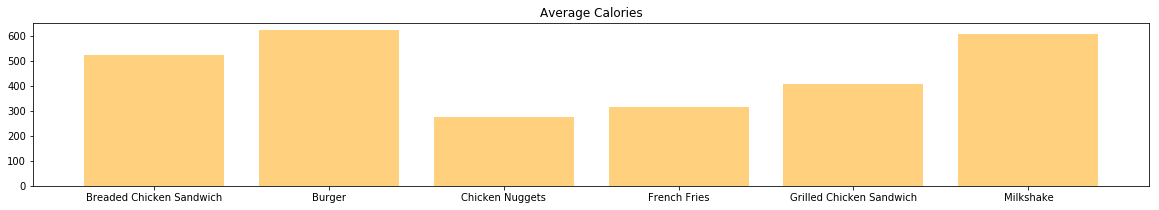

In [119]:
#Average calories by Resutrant
nutr_pd_gr=nutr_pd.groupby(['Type']).mean()
x_axis = np.arange(len(nutr_pd_gr))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, nutr_pd_gr["Calories"], color='orange', alpha=0.5, align="edge")
plt.title('Average Calories')
plt.xticks(tick_locations, nutr_pd_gr.index.values, rotation="horizontal")

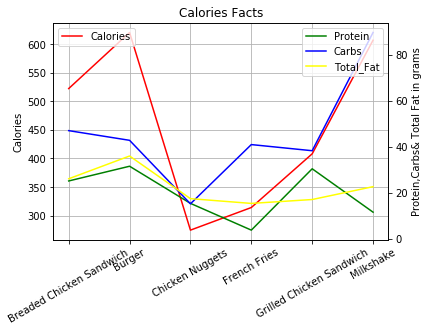

In [120]:
#Nutrition Analysis,,,,,
plt.title('Calories Facts')      #Plot the title
x_axis = np.arange(len(nutr_pd_gr))
plt.grid(True)  #Turn the grid on
plt.ylabel('Calories')   #Set ylabels
plt.plot(nutr_pd_gr.index.values,nutr_pd_gr['Calories'] , color='red' ,label='Calories')   
plt.xticks(tick_locations, nutr_pd_gr.index.values,rotation=30)
plt.legend(loc='upper left')                    #plot the legend
plt2=plt.twinx()                                #Create a second y axis
# #     plt.ylim(93450,93525)                           #Set limits of second y axis- adjust to readings you are getting
plt2.plot(nutr_pd_gr.index.values,nutr_pd_gr['Protein'] ,color= 'green',label='Protein') #plot pressure data
plt2.plot(nutr_pd_gr.index.values,nutr_pd_gr['Carbs'] ,color= 'blue',label='Carbs')
plt2.plot(nutr_pd_gr.index.values,nutr_pd_gr['Total_Fat'] ,color= 'yellow',label='Total_Fat')
plt2.set_ylabel('Protein,Carbs& Total Fat in grams')                    #label second y axis
         #Force matplotlib to NOT autoscale y axis
plt2.legend(loc='upper right')                  #plot the legend

In [101]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [102]:
##Know Your Food
printmd("**Choose a Fast Food Chain**")
list_res = nutr_pd['Restaurant_Name'].unique()
list_item=[]
#print(list_res[0])
for index ,value in enumerate(list_res):
    print(index,value)
res_choice=list_res[int(input("Choose Restaurant: "))]
printmd('')
printmd('**Choose Menu Item**')
list_item = nutr_pd[nutr_pd['Restaurant_Name'] == res_choice]['Item']
list_item.reset_index(drop=True, inplace=True)
for index ,value in enumerate(list_item):
   print(index,value)
item=list_item[int(input("Choose Menu Item: "))]

**Choose a Fast Food Chain**

0 McDonald's
1 Burger King
2 Wendy's
3 Chick-fil-A
4 Jack in the Box
5 Sonic
6 Dairy Queen
7 Carl's Jr.
8 Hardee's
9 White Castle
10 Whataburger
11 In-N-Out Burger
Choose Restaurant: 10


**Choose Menu Item**

0 Whataburger Jr.¨
1 Whataburger Jr.¨ with Bacon & Cheese
2 Whataburger
3 Whataburger¨ Patty Melt
4 Double Meat Whataburger
5 A.1.¨ Thick & Hearty Burger
6 Chop House Cheddar Burger
7 Grilled Chicken Sandwich
8 Whatachick'n¨ Sandwich
9 Whatachick'n¨ Strips 2 Piece
10 French Fries (Small)
11 Chocolate Shake 16 oz
Choose Menu Item: 2


In [103]:
nutr_pd1=nutr_pd.query ("Restaurant_Name == @res_choice and Item == @item")
nutr_pd1.reset_index(drop=True, inplace=True)
nutr_pd1.style

,Restaurant_Name,Item,Type,Serving_Size,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Sodium,Carbs,Sugars,Protein
0,Whataburger,Whataburger,Burger,316,590,25,8,1,1220,62,12,29


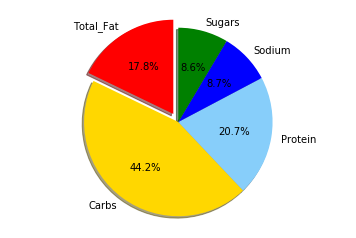

In [104]:
labels = ['Total_Fat', 'Carbs', 'Protein','Sodium','Sugars']
sizes = [nutr_pd1['Total_Fat'][0],nutr_pd1['Carbs'][0],nutr_pd1['Protein'][0],nutr_pd1['Sodium'][0]/100,nutr_pd1['Sugars'][0]]
explode = (0.1, 0.0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['red', 'gold', 'lightskyblue', 'blue','green']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

([<matplotlib.axis.XTick at 0x1a1b36c7b8>,
 <a list of 12 Text xticklabel objects>)

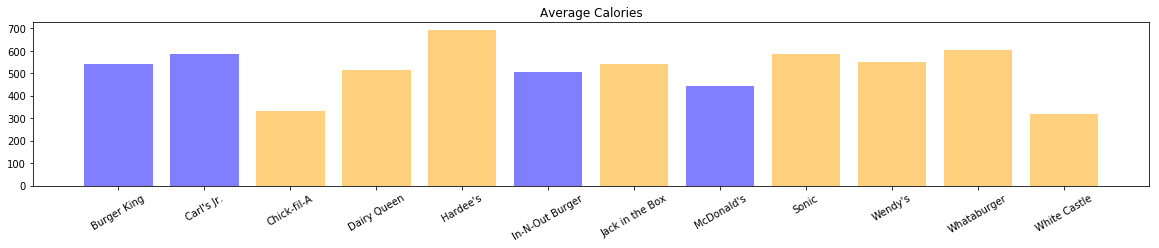

In [105]:
#Average calories by Resutrant
nutr_pd_gr=nutr_pd.groupby(['Restaurant_Name']).mean()
x_axis = np.arange(len(nutr_pd_gr))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
color =['blue','blue','orange','orange','orange','blue','orange','blue','orange','orange','orange','orange']
plt.bar(x_axis, nutr_pd_gr["Calories"], color=color, alpha=0.5, align="edge")
plt.title('Average Calories')
plt.xticks(tick_locations, nutr_pd_gr.index.values, rotation=30)
    

([<matplotlib.axis.XTick at 0x1a1b24ab00>,
 <a list of 12 Text xticklabel objects>)

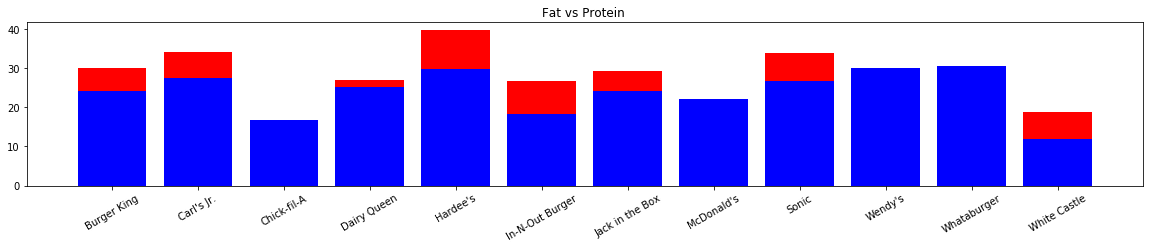

In [106]:
nutr_pd_gr=nutr_pd.groupby(['Restaurant_Name']).mean()
x_axis = np.arange(len(nutr_pd_gr))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, nutr_pd_gr["Total_Fat"], color='r',align="edge")
plt.bar(x_axis, nutr_pd_gr["Protein"], color='b',align="edge" )
#plt.bar(x_axis, nutr_pd_gr["Total_Fat"], color='r',align="edge")
plt.title('Fat vs Protein ')
plt.xticks(tick_locations, nutr_pd_gr.index.values, rotation=30)
    

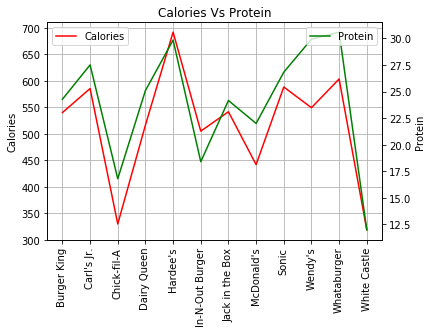

In [107]:
plt.title('Calories Vs Protein')      #Plot the title
x_axis = np.arange(len(nutr_pd_gr))
plt.grid(True)  #Turn the grid on
plt.ylabel('Calories')   #Set ylabels
plt.plot(nutr_pd_gr.index.values,nutr_pd_gr['Calories'] , color='red' ,label='Calories')   
plt.xticks(tick_locations, nutr_pd_gr.index.values,rotation="vertical")
plt.legend(loc='upper left')                    #plot the legend
plt2=plt.twinx()                                #Create a second y axis
# #     plt.ylim(93450,93525)                           #Set limits of second y axis- adjust to readings you are getting
plt2.plot(nutr_pd_gr.index.values,nutr_pd_gr['Protein'] ,color= 'green',label='Protein') #plot pressure data
plt2.set_ylabel('Protein')                    #label second y axis
         #Force matplotlib to NOT autoscale y axis
plt2.legend(loc='upper right')                  #plot the legend

In [108]:
#Import Nutrition Facts  from file 
# load CSV
nutr_file = "Nutrition Data for Fast Food 2017.csv"
tweet_hand_file = "RestaurantTwitterName.csv"
nutr_pd = pd.read_csv(nutr_file, encoding='iso-8859-1', low_memory=False)
restu_list=nutr_pd.Fast_Food_Restaurant.unique()
tweet_hand_pd = pd.read_csv(tweet_hand_file, encoding='iso-8859-1', low_memory=False)
tweet_hand_pd.rename(columns={'Restaurant Name': 'Restaurant_Name', 'Twitter Name': 'Twitter_Name'}, inplace=True)
tweet_hand_pd['Twitter_count']=''
tweet_hand_pd=tweet_hand_pd.set_index(['Twitter_Name'])
for index, row in tweet_hand_pd.iterrows():
    tweet_hand_pd.loc[index,'Twitter_count'] = twitter_followers(index)
tweet_hand_pd.sort_values(by=['Restaurant_Name'],inplace=True)
print(tweet_hand_pd)

               Restaurant_Name Twitter_count
Twitter_Name                                
@BurgerKing        Burger King       1619066
@CarlsJr            Carl's Jr.         96628
@ChickfilA         Chick-fil-A        917098
@DairyQueen        Dairy Queen        469501
@Hardees              Hardee's         68914
@innoutburger  In-N-Out Burger         46064
@JackBox       Jack in the Box         95017
@McDonalds          McDonald's       3582417
@sonicdrivein            Sonic        360184
@Wendys                Wendy's       2495943
@Whataburger       Whataburger       1263744
@WhiteCastle      White Castle         91746


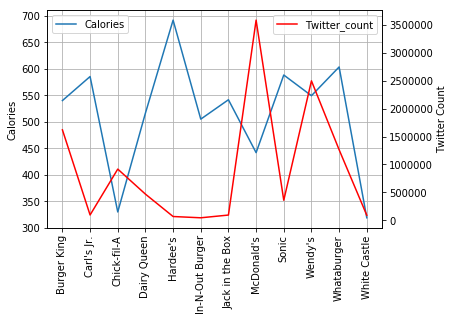

In [110]:
x_axis = np.arange(len(nutr_pd_gr))
plt.grid(True)  #Turn the grid on
plt.ylabel('Calories')   #Set ylabels
plt.plot(nutr_pd_gr.index.values,nutr_pd_gr['Calories'] , label='Calories')   
plt.xticks(tick_locations, nutr_pd_gr.index.values, rotation="vertical")
plt.legend(loc='upper left')                    #plot the legend
plt2=plt.twinx()                                #Create a second y axis
plt2.plot(tweet_hand_pd['Restaurant_Name'],tweet_hand_pd['Twitter_count'] ,color='red',label='Twitter_count') #plot pressure data
plt2.set_ylabel('Twitter Count')                    #label second y axis     #Force matplotlib to NOT autoscale y axis
plt2.legend(loc='upper right')                  #plot the legend

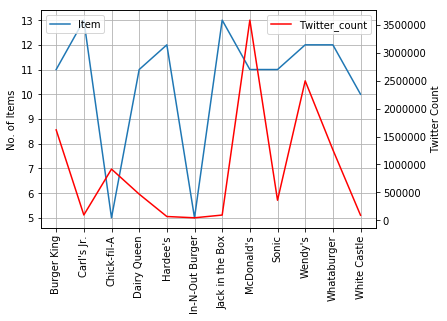

In [115]:

nutr_pd_gr=nutr_pd.groupby(['Fast_Food_Restaurant']).count()
x_axis = np.arange(len(nutr_pd_gr))
plt.grid(True)  #Turn the grid on
plt.ylabel('No. of Items')   #Set ylabels
plt.plot(nutr_pd_gr.index.values,nutr_pd_gr['Item'] , label='Item')   
plt.xticks(tick_locations, nutr_pd_gr.index.values, rotation="vertical")
plt.legend(loc='upper left')                    #plot the legend
plt2=plt.twinx()                                #Create a second y axis
plt2.plot(tweet_hand_pd['Restaurant_Name'],tweet_hand_pd['Twitter_count'] ,color='red',label='Twitter_count') #plot pressure data
plt2.set_ylabel('Twitter Count')                    #label second y axis     #Force matplotlib to NOT autoscale y axis
plt2.legend(loc='upper right')                  #plot the legend

In [ ]:
# Yelp api 